In [78]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

from utils import count_digits, extract_features, predict

In [2]:
df = pd.read_csv('Dataset.csv')
df

,Number,Target
0,5030,2
1,3252,0
2,2114,1
3,5212,0
4,1668,4
...,...,...
495,7657,1
496,1421,1
497,2889,5
498,4311,1


In [4]:
numbers = range(0, 10)
numbers = list(map(str, numbers))
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [70]:
column_names = list()

for digit in numbers:
    column_names.append(f'{digit} count')
    
with open('Column names.txt', 'w') as file:
    for name in column_names:
        file.write(f'{name}\n')
    
column_names

['0 count',
 '1 count',
 '2 count',
 '3 count',
 '4 count',
 '5 count',
 '6 count',
 '7 count',
 '8 count',
 '9 count']

In [13]:
# Create a function which counts the number of each digit
# def count_digits(number: int) -> np.array:
#     # Make a dictionary containing a count of occurence of each digit
#     digit_dict = {x: 0 for x in range(0, 10)}
#     for digit in str(number):
#         # Increment the corresponding digit on each occurence.
#         digit_dict[int(digit)] += 1
        
#     to_return = list(digit_dict.values())
#     return np.array(to_return)

In [71]:
ans = df['Number'].apply(count_digits)
ans

0      [2, 0, 0, 1, 0, 1, 0, 0, 0, 0]
1      [0, 0, 2, 1, 0, 1, 0, 0, 0, 0]
2      [0, 2, 1, 0, 1, 0, 0, 0, 0, 0]
3      [0, 1, 2, 0, 0, 1, 0, 0, 0, 0]
4      [0, 1, 0, 0, 0, 0, 2, 0, 1, 0]
                    ...              
495    [0, 0, 0, 0, 0, 1, 1, 2, 0, 0]
496    [0, 2, 1, 0, 1, 0, 0, 0, 0, 0]
497    [0, 0, 1, 0, 0, 0, 0, 0, 2, 1]
498    [0, 2, 0, 1, 1, 0, 0, 0, 0, 0]
499    [0, 2, 0, 0, 0, 1, 0, 1, 0, 0]
Name: Number, Length: 500, dtype: object

In [31]:
df_new = pd.DataFrame(ans.to_list(), columns=column_names)
df_new['Number'] = df['Number']
df_new['Target'] = df['Target']
df = df_new
df = df[['Number'] + [ col for col in df.columns if col != 'Number' ] ]
df

,Number,0 count,1 count,2 count,3 count,4 count,5 count,6 count,7 count,8 count,9 count,Target
0,5030,2,0,0,1,0,1,0,0,0,0,2
1,3252,0,0,2,1,0,1,0,0,0,0,0
2,2114,0,2,1,0,1,0,0,0,0,0,1
3,5212,0,1,2,0,0,1,0,0,0,0,0
4,1668,0,1,0,0,0,0,2,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
495,7657,0,0,0,0,0,1,1,2,0,0,1
496,1421,0,2,1,0,1,0,0,0,0,0,1
497,2889,0,0,1,0,0,0,0,0,2,1,5
498,4311,0,2,0,1,1,0,0,0,0,0,1


Training and testing.

In [34]:
X = df.drop(['Number', 'Target'], axis=1)
y = df['Target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=949
)

In [44]:
optimizer = Adam(learning_rate=0.01)

model = Sequential()
model.add(Dense(20, input_dim=10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [72]:
stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=2, 
    validation_split=0.2, 
    verbose=1,
    callbacks=[stopper]
)

Epoch 1/50
160/160 [==============================] - 1s 4ms/step - loss: 1.7050e-04 - val_loss: 2.9968e-05
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 2.0670e-05 - val_loss: 1.7608e-05
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0032 - val_loss: 0.0361
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 5.2738e-04
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 2.2210e-04 - val_loss: 2.3467e-05
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 1.2321e-05 - val_loss: 6.5450e-06
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 3.8450e-06 - val_loss: 5.1638e-07
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 1.6617e-07 - val_loss: 1.6525e-07
Epoch 9/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3991e-07 - val_loss: 3.1156e-08
Epoch 10/50
160/160 [===================

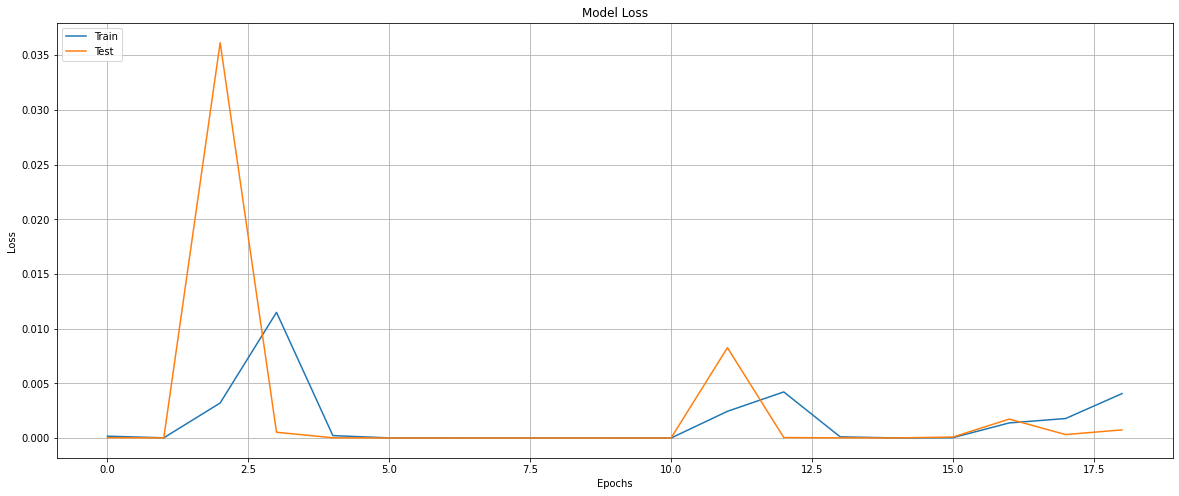

In [73]:
# For accuracy
plt.figure(figsize = (20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc ='upper left')
plt.grid()
plt.show()

In [81]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [82]:
predictions = [round(prediction[0]) for prediction in predictions]
np.array(predictions)

list

In [77]:
model.save('Holes_predictor.h5')